<a href="https://colab.research.google.com/github/Hassan-jr/Tensorflow-Deep-Learning/blob/main/01_Tensorflow_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regration

In [35]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

tf.__version__

'2.11.0'

## Data Preparation

In [36]:
X = np.arange(0,100,2)
X = tf.constant(X, shape=(50), dtype=tf.float32)
Y = 0.7 * X + 0.3
Y

<tf.Tensor: shape=(50,), dtype=float32, numpy=
array([ 0.3     ,  1.7     ,  3.1     ,  4.5     ,  5.9     ,  7.3     ,
        8.7     , 10.1     , 11.5     , 12.9     , 14.3     , 15.7     ,
       17.099998, 18.499998, 19.9     , 21.3     , 22.699999, 24.099998,
       25.499998, 26.9     , 28.3     , 29.699999, 31.099998, 32.5     ,
       33.899998, 35.3     , 36.699997, 38.1     , 39.5     , 40.899998,
       42.3     , 43.699997, 45.1     , 46.5     , 47.899998, 49.3     ,
       50.699997, 52.1     , 53.5     , 54.899998, 56.3     , 57.699997,
       59.1     , 60.5     , 61.899998, 63.3     , 64.700005, 66.1     ,
       67.5     , 68.9     ], dtype=float32)>

In [37]:
split = int(0.8 * len(X))
X.shape, Y.shape

(TensorShape([50]), TensorShape([50]))

In [38]:
X_train,X_test, Y_train, Y_test = X[:split], X[split:], Y[:split], Y[split:]
len(X_train),len(X_test),len(Y_train),len(Y_test)

(40, 10, 40, 10)

In [39]:
def plot_prediction(X_train=X_train,
                    X_test=X_test,
                    Y_train = Y_train,
                    Y_test=Y_test,
                    Prediction = None):
  plt.scatter(X_train,Y_train, c='b', label="Training Data")
  plt.scatter(X_test,Y_test, c='g', label= "Testing Data")

  if Prediction is not None:
    plt.scatter(X_test,Prediction, c='r', label="Predicted Data")

  plt.legend()

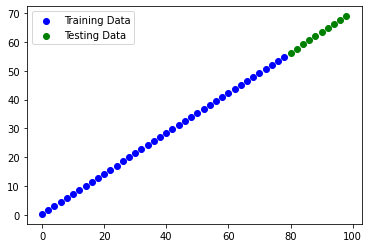

In [40]:
plot_prediction()

## Create The Model

In [41]:
X_train.dtype, Y_train.dtype

(tf.float32, tf.float32)

In [142]:
tf.random.set_seed(42)
# 1 create
model_0 = tf.keras.Sequential([
    tf.keras.layers.Dense(10,input_shape=[1]),
    tf.keras.layers.Dense(1)
])
#

# 2 compile
model_0.compile(loss=tf.keras.losses.mae,
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["mae"])

# 3 fit
history = model_0.fit(tf.expand_dims(X_train, axis=-1),Y_train, epochs=50)

Epoch 1/50
2/2 [==============================] - 1s 11ms/step - loss: 31.8576 - mae: 31.8576
Epoch 2/50
2/2 [==============================] - 0s 8ms/step - loss: 31.1160 - mae: 31.1160
Epoch 3/50
2/2 [==============================] - 0s 9ms/step - loss: 30.3444 - mae: 30.3444
Epoch 4/50
2/2 [==============================] - 0s 9ms/step - loss: 29.5839 - mae: 29.5839
Epoch 5/50
2/2 [==============================] - 0s 9ms/step - loss: 28.8205 - mae: 28.8205
Epoch 6/50
2/2 [==============================] - 0s 8ms/step - loss: 28.0873 - mae: 28.0873
Epoch 7/50
2/2 [==============================] - 0s 9ms/step - loss: 27.3307 - mae: 27.3307
Epoch 8/50
2/2 [==============================] - 0s 9ms/step - loss: 26.6045 - mae: 26.6045
Epoch 9/50
2/2 [==============================] - 0s 8ms/step - loss: 25.8201 - mae: 25.8201
Epoch 10/50
2/2 [==============================] - 0s 9ms/step - loss: 25.0774 - mae: 25.0774
Epoch 11/50
2/2 [==============================] - 0s 12ms/step - lo

In [143]:
# 4 evaluate
model_0.evaluate(X_test,Y_test)

1/1 [==============================] - 0s 150ms/step - loss: 1.0308 - mae: 1.0308


[1.030806303024292, 1.030806303024292]

In [144]:
Y_preds = model_0.predict(X_test)
Y_preds = tf.squeeze(Y_preds)
Y_preds

1/1 [==============================] - 0s 103ms/step


<tf.Tensor: shape=(10,), dtype=float32, numpy=
array([57.24758 , 58.666084, 60.084568, 61.503075, 62.92156 , 64.34005 ,
       65.75855 , 67.17704 , 68.595535, 70.014046], dtype=float32)>

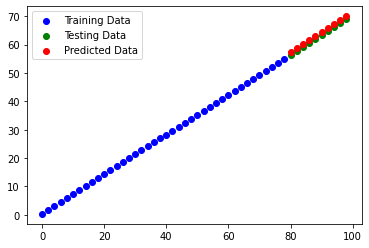

In [145]:
plot_prediction(Prediction=Y_preds)

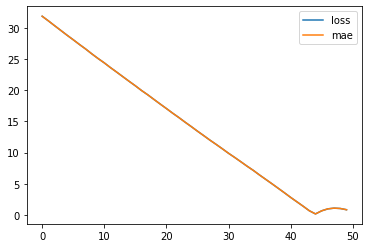

In [146]:
import pandas as pd
pd.DataFrame(history.history).plot()